# Basic image processes Ⅳ

&copy; 孙正男 3190104890@zju.edu.cn

- Image Scaling
- Add text and graphics
- Bitwise and mask

# 1 Image Scaling
<img src=".\images\advanced\Resize_show.png" style="zoom:30%">

## 1.1 基本原理
* 图像缩放（image scaling）是指对数字图像的大小进行调整的过程。图像缩放是一种非平凡的过程，需要在处理效率以及结果的平滑度（smoothness）和清晰度（sharpness）上做一个权衡。
* 基本原理就是一种映射，即缩小后或者放大后的图像像素位置向原图的一个映射。简单理解就是，**将放大或者缩小后的图像将其的坐标（长宽）拉伸或者压缩到和原图一样大时，其像素坐标点对应在原图上的位置就是其映射位置**
<img src=".\images\advanced\scaling_th.png" style="zoom:50%">
* 由上图可以看出，放大或者缩小后的图像的像素值取决于其映射到原图相应位置周围的元素

* 插值法缩放图像第一步——映射：插值法放大图像的第一步都是相同的，遍历新图。计算新图的坐标点像素值对应原图中哪个坐标点的像素值来填充，计算公式为：
$$
srcH = dstH \times \left(\frac {srcHeight} {dstHeight}\right)
$$
$$
srcW = dstW \times \left(\frac {srcWidth} {dstWidth}\right)
$$
<img src=".\images\advanced\scaling_f.png" style="zoom:80%">
* 通过这个映射公式算出来的 scrH,scrW（旧图坐标）有可能是小数，但是坐标点是不存在小数的，都是整数，得想办法把它转换成整数才行。

## 1.2 最邻近插值法
- 
<img src=".\images\advanced\最近邻插值1.png" style="zoom:80%">
<img src=".\images\advanced\最近邻插值2.png" style="zoom:80%">
- 这样的做法会导致像素的变化不连续，在新图中会产生锯齿。

## 1.3 双线性插值法
* 线性插值是指插值函数为**一次多项式的插值方式**，其在插值节点上的插值误差为零。线性插值相比其他插值方式，如抛物线插值，具有简单、方便的特点。线性插值的几何意义即为概述图中利用过A点和B点的直线来近似表示原函数。
* 线性插值可以用来近似代替原函数，也可以用来计算得到查表过程中表中没有的数值。
<img src=".\images\advanced\xianxingchazhi.png" style="zoom:80%">

* 双线性插值：就是在x和y方向个来一次单线性插值
<img src=".\images\advanced\sxxcz.jpg" style="zoom:80%">

* **image scaling in opencv**:
```
cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst
```
    * scr：变换操作的输入图像
    * dsize： 输出图像的大小，二元元组 (width, height)
    * dst：变换操作的输出图像，可选项
    * fx, fy：x 轴、y 轴上的缩放比例，实型，可选项
    * interpolation：插值方法，整型，可选项:
        * cv2.INTER_LINEAR：双线性插值（默认方法）
        * cv2.INTER_AREA：使用像素区域关系重采样，缩小图像时可以避免波纹出现
        * cv2.INTER_NEAREST：最近邻插值
        * cv2.INTER_CUBIC：4x4 像素邻域的双三次插值
        * cv2.INTER_LANCZOS4：8x8 像素邻域的Lanczos插值
     * 返回值：dst，变换操作的输出图像，ndarray 多维数组

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [2]:
# 绘制多张图片的函数
def my_display_imglist(
        img_list:List[np.ndarray],
        titles:List[str],
        figsize:tuple=(8,4)
    ) -> None:
    num = len(img_list)
    # determine subplt shape
    colum = 1
    while colum * colum < num:
        colum += 1
    row = 1
    while row * colum < num:
        row += 1
    # display
    index = 1
    plt.figure(figsize=figsize, dpi=80)
    for img in img_list:
        plt.subplot(row, colum, index)
        
        # 检测是彩色图片还是灰度图
        if np.shape(img)[2] == 3:
            plt.imshow(img)
        elif np.shape(img)[2] == 1:
            plt.imshow(img, 'gray', aspect='auto')
        else:
            raise TypeError
        
        plt.title(titles[index-1])
        index += 1
#     plt.show() 

* 一般有两种缩放方式：
    * 已知目标图像的长宽
    * 已知原图的缩放比例

flower_img.shape:  (413, 660, 3)


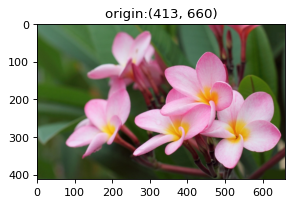

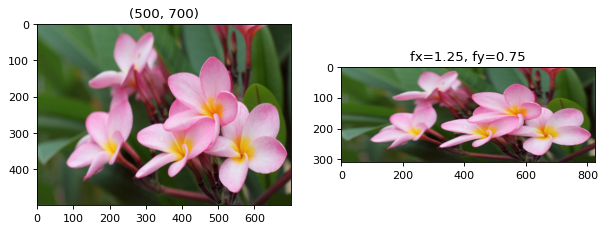

In [3]:
# ImRead
flower_img = cv2.imread(r".\images\beautiful_flower.jpg")
flower_img = cv2.cvtColor(flower_img, cv2.COLOR_BGR2RGB)
print("flower_img.shape: ", flower_img.shape)
# plt
my_display_imglist(
    [flower_img],
    ["origin:"+str(flower_img.shape[:2])],
    figsize=(4,3)
)

# Type 1: 自定义目标图像大小
height, width = (500, 700)
flower_resize_1 = cv2.resize(flower_img, (width, height))

# Type 2: 按比例缩放目标图像
flower_resize_2 = cv2.resize(flower_img, None, fx=1.25, fy=0.75, interpolation=cv2.INTER_LINEAR)

# plt
my_display_imglist(
    [flower_resize_1, flower_resize_2],
    ["(500, 700)",    "fx=1.25, fy=0.75"],
    figsize=(9,5)
)

* 不同插值方法进行比较

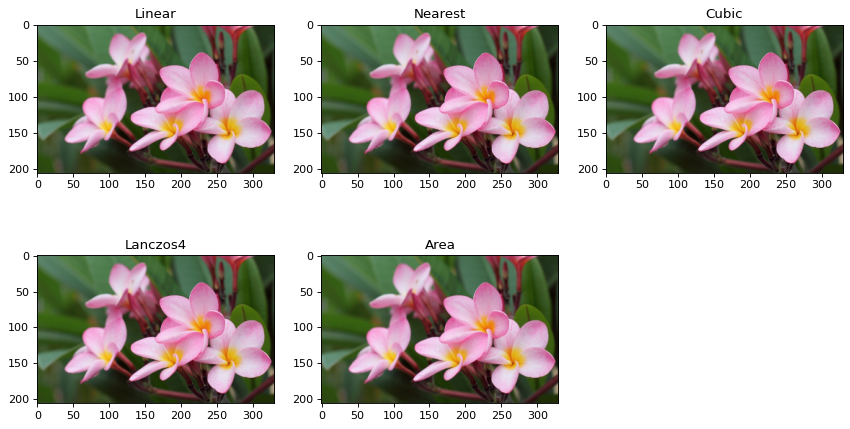

In [4]:
# 双线性插值
flower_resize_linear = cv2.resize(flower_img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
# 最近邻插值
flower_resize_nearest = cv2.resize(flower_img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
# 4x4 像素邻域的双三次插值
flower_resize_cubic = cv2.resize(flower_img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
# 8x8 像素邻域的Lanczos插值
flower_resize_lanczos4 = cv2.resize(flower_img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LANCZOS4)
# 使用像素区域关系重采样，缩小图像时可以避免波纹出现
flower_resize_area = cv2.resize(flower_img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# plt
my_display_imglist(
    [flower_resize_linear,
     flower_resize_nearest,
     flower_resize_cubic,
     flower_resize_lanczos4,
     flower_resize_area,],
    ["Linear",
     "Nearest",
     "Cubic",
     "Lanczos4",
     "Area"],
    figsize=(13,7)
)

## 1.4 例题
* 裁剪下图（图片地址为".\images\beautiful_flower.jpg"），裁剪区域为height：171-374，width：56-273，并将裁剪得到的图片放大两倍。裁剪得到的效果应如右图所示
<table>
  <td>
    <img src=".\images\beautiful_flower.jpg" style="zoom:80%">
  </td>
  <td>
    <img src=".\images\examples\beautiful_flower_result.jpg" style="zoom:80%">
  </td>
</table>

读取成功！


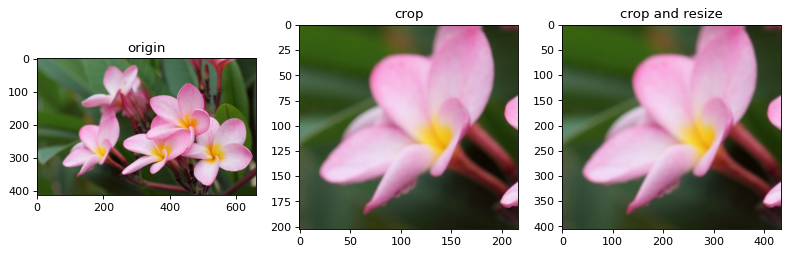

In [1]:
#import
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# imread
img_flower = cv2.imread(r".\images\beautiful_flower.jpg")
img_flower = cv2.cvtColor(img_flower, cv2.COLOR_BGR2RGB)
if isinstance(img_flower, (np.ndarray, np.generic)):
    print("读取成功！")
else:
    raise Exception("读取错误！")

# crop
img_crop = img_flower[171:374, 56:273]

# resize
img_resize = cv2.resize(img_crop, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

# plt
index = 0
titles = ["origin",   "crop",   "crop and resize"]
plt.figure(figsize=(12,4), dpi=80)
for img in [img_flower, img_crop, img_resize]:
    plt.subplot(1, 3, index+1)
    plt.imshow(img)
    plt.title(titles[index])
    index += 1

# 2 Add text and graphics
## 2.1 Add text in opencv
* cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])   **不支持中文**
    * image:要在其上绘制文本的图像
    * text:要绘制的文本字符串
    * org:它是图像中文本字符串左下角的坐标。坐标表示为两个值的元组，即(X坐标值，Y坐标值)
    * font:它表示字体类型。一些字体类型是FONT_HERSHEY_SIMPLEX,FONT_HERSHEY_PLAIN等
    * fontScale:字体比例因子乘以font-specific基本大小
    * color:它是要绘制的文本字符串的颜色(BGR格式)。对于BGR，我们通过一个元组。例如：(255，0，0)为蓝色
    * thickness:它是线的粗细像素
    * lineType:这是一个可选参数，它给出了要使用的行的类型
    * bottomLeftOrigin:这是一个可选参数。如果为true，则图像数据原点位于左下角。否则，它位于左上角

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

读取成功！


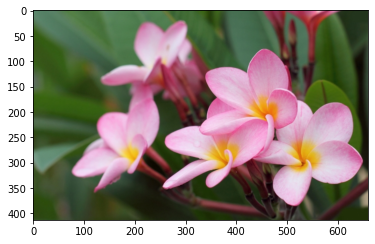

In [2]:
# imread
img_flower = cv2.imread(r".\images\beautiful_flower.jpg")
if isinstance(img_flower, np.ndarray):
    print("读取成功！")
else:
    raise Exception("读取错误！")
img_flower = cv2.cvtColor(img_flower, cv2.COLOR_BGR2RGB)

plt.imshow(img_flower)

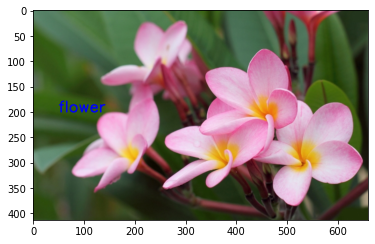

In [3]:
# PutText "flower"
img_text1 = np.copy(img_flower)
font = cv2.FONT_HERSHEY_SIMPLEX
text = "flower"
pos = (50, 200)
font_scale = 1
color = (0,0,255)
thickness = 2
cv2.putText(img_text1, text, pos, font, font_scale, color, thickness)

plt.imshow(img_text1)

* 将中文显示到图片上：可以使用PIL库

In [1]:
import cv2
from PIL import Image,ImageDraw,ImageFont
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

In [2]:
def cv2AddChineseText(
    img:np.ndarray, 
    text:str, 
    position:Tuple[int, int], 
    textColor:Tuple[int, int, int]=(0, 255, 0), 
    textSize:int=30,
    thickness:int=2
) -> np.ndarray:
    if isinstance(img, str):
        img = cv2.imread(img)
        
    if isinstance(img, np.ndarray):  
        img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        raise Exception("请输入cv2格式的图片！")
    
    draw = ImageDraw.Draw(img)

    fontStyle = ImageFont.truetype(
        "simsun.ttc", textSize, encoding="utf-8")

    draw.text(position, text, textColor, font=fontStyle, stroke_width=thickness)

    return cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)

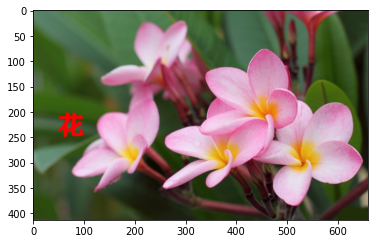

In [3]:
# Add text"花"
img_path = r".\images\beautiful_flower.jpg"
img_text2  = cv2AddChineseText(img_path,
                               text='花',
                               position=(50,200),
                               textColor=(255, 0 , 0), 
                               textSize=50,
                               thickness=2)

#plt
plt.imshow(cv2.cvtColor(img_text2, cv2.COLOR_BGR2RGB))

## 2.2 Add graphics in opencv
* 绘制直线：
    * dst = cv2.line(src, pt1, pt2, color [, thickness [, lineType]])
        * dst：绘制好直线后的图片
        * src：输入的图像容器（会直接添加到它上面）
        * pt1,pt2：线段的起点和终点。类型为tuple.
        * color：绘制直线的颜色。通常使用BGR模型表示，tuple
        * thickness：线条的粗细。默认为1。 值越大越粗
        * lineType：线条类型。默认为8连接类型。
* 绘制矩形：
    * dst = cv2.rectangle(src, pt1, pt2, color[, thickness[, lineType]])
        * dst：绘制好矩形后的图片
        * src：输入的图像容器（会直接添加到它上面）
        * pt1,pt2：矩形的顶点和其对角的顶点，类型为tuple
        * color：绘制直线的颜色。通常使用BGR模型表示，tuple
        * thickness：线条的粗细。若为 -1，表示绘制的是实心图形
        * lineType：线条类型。默认为8连接类型。
* 绘制圆：
    * dst = cv2.circle(src, center, radius, color[, thickness [,lineType]])
        * dst：绘制好圆后的图片
        * src：输入的图像容器（会直接添加到它上面）
        * center：圆心。
        * radius：半径。
        * color：绘制直线的颜色。通常使用BGR模型表示，tuple
        * thickness:线条的粗细。若为 -1. 表示绘制的是实心图形
        * lineType: 线条类型。默认为8连接类型。
* 绘制椭圆：img = cv2.ellipse()
* 绘制多边形：img = cv2.polylines()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

读取成功！


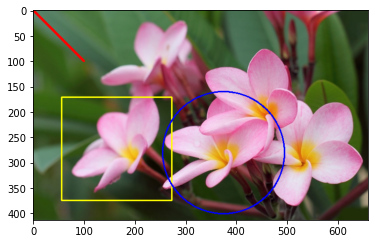

In [2]:
# imread
img_flower = cv2.imread(r".\images\beautiful_flower.jpg")
if isinstance(img_flower, np.ndarray):
    print("读取成功！")
else:
    raise Exception("读取错误！")
img_flower = cv2.cvtColor(img_flower, cv2.COLOR_BGR2RGB)


# add line
cv2.line(img_flower, (0, 0), (100, 100), (255, 0,0), thickness=3)

# add rect
cv2.rectangle(img_flower, (56, 171), (273, 374), (255, 255,0), thickness=2)

# add circle
cv2.circle(img_flower, (375, 280), 120, (0, 0,255), thickness=2)

plt.imshow(img_flower)

# 3 Bitwise and Mask 
<table>
  <td>
    <img src=".\images\opencv-basic\mask_show.jpg" style="zoom:80%">
  </td>
  <td>
    <img src=".\images\opencv-basic\mask_show2.jpg" style="zoom:80%">
  </td>
</table>

## 3.1 Mask 掩膜
* 仅仅暴露原始图像中的感兴趣区域（ROI）的模板图像就被叫做掩模
* 在程序中用**二值图像**来表示，**0值区域标识被遮盖的部分，255值区域表示被暴露的部分**
<table>
  <td>
    <img src=".\images\cv.png" style="zoom:80%">
  </td>
  <td>
    <img src=".\images\opencv-basic\mask_demo.jpg" style="zoom:80%">
  </td>
</table>

## 3.2 按位Bitwise 运算
* dst = cv2.bitwise_and(src1,src2,mask=mask)
    * 先dst = src1 & src2
    * 再对dst进行mask的掩膜运算
* dst = cv2.bitwise_or(src1,src2,mask=mask)
    * 先dst = src1 | src2
    * 再对dst进行mask的掩膜运算
* dst = cv2.bitwise_xor(src1,src2,mask=mask)
    * 先dst = src1 ^ src2
    * 再对dst进行mask的掩膜运算
* dst = cv2.bitwise_not(src,mask=mask)
    * 先dst = ~src
    * 再对dst进行mask的掩膜运算

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'mask_part2')

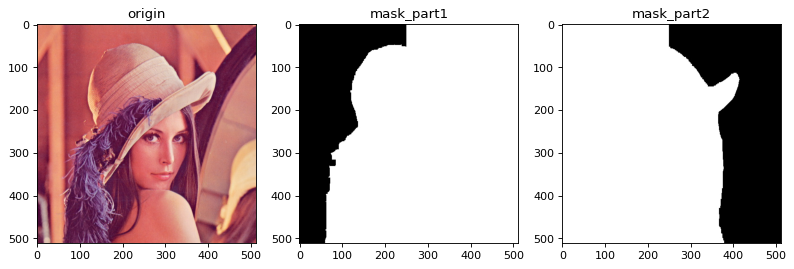

In [2]:
# Imread
img_ori = cv2.imread(r".\images\cv.png", cv2.IMREAD_COLOR)
img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
mask_part1 = cv2.imread(r".\images\opencv-basic\mask_part1.jpg", cv2.IMREAD_GRAYSCALE)
mask_part2 = cv2.imread(r".\images\opencv-basic\mask_part2.jpg", cv2.IMREAD_GRAYSCALE)

# plt
plt.figure(figsize=(12,4), dpi=80)
plt.subplot(1,3,1)
plt.imshow(img_ori)
plt.title("origin")
plt.subplot(1,3,2)
plt.imshow(mask_part1, "gray")
plt.title("mask_part1")
plt.subplot(1,3,3)
plt.imshow(mask_part2, "gray")
plt.title("mask_part2")

### 3.2.1 bitwise_and

Text(0.5, 1.0, 'Bitwise And')

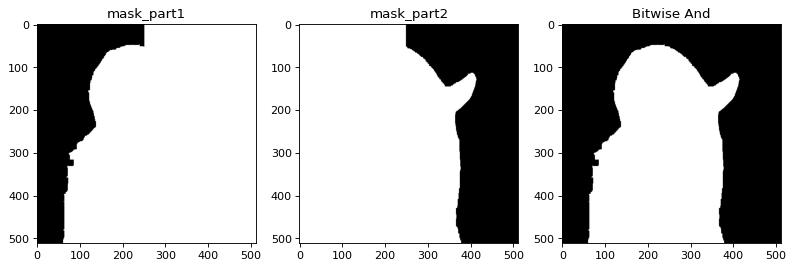

In [3]:
# Bitwise_And Two Mask Part
mask = cv2.bitwise_and(mask_part1,mask_part2)

# plt
plt.figure(figsize=(12,4), dpi=80)
plt.subplot(1,3,1)
plt.imshow(mask_part1, "gray")
plt.title("mask_part1")
plt.subplot(1,3,2)
plt.imshow(mask_part2, "gray")
plt.title("mask_part2")
plt.subplot(1,3,3)
plt.imshow(mask, "gray")
plt.title("Bitwise And")

Text(0.5, 1.0, 'img mask')

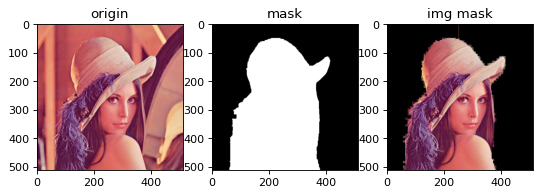

In [4]:
# Mask Origin Image
img_mask = cv2.bitwise_and(img_ori,img_ori, mask=mask)

# plt
plt.figure(figsize=(8,4), dpi=80)
plt.subplot(1,3,1)
plt.imshow(img_ori)
plt.title("origin")
plt.subplot(1,3,2)
plt.imshow(mask, "gray")
plt.title("mask")
plt.subplot(1,3,3)
plt.imshow(img_mask)
plt.title("img mask")

### 保存透明背景图片
* png格式的图片有四通道：R、G、B、A。A表示透明度，0为100%透明，255为不透明

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def rembg_save_png(
    img:np.ndarray,
    mask:np.ndarray,
    save_path:str
) -> bool:
    # 保证输入格式正确
    assert isinstance(mask, np.ndarray) and \
           isinstance(img, np.ndarray) and \
           isinstance(save_path, str) and \
           save_path.endswith('png')
    # 如果文件目录不存在则创建目录
    outPutDirName = os.path.dirname(save_path)
    os.makedirs(outPutDirName, exist_ok=True)
    
    # 创建png图片数组
    h, w, _ = np.shape(img)
    outimg = np.zeros((h, w, 4))
    outimg[:, :, :3] = img
    outimg[:, :, 3] = mask
    outimg = outimg.astype(np.uint8)
    
    # 保存图片
    return cv2.imwrite(save_path, outimg)

In [7]:
# 测试
# Imread
img_ori = cv2.imread(r".\images\cv.png", cv2.IMREAD_COLOR)
mask = cv2.imread(r".\images\opencv-basic\mask_demo.jpg", cv2.IMREAD_GRAYSCALE)

# save png pic
save_path = ".\data\cv.png"
rembg_save_png(img_ori, mask, save_path)
img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)

### 3.2.2 bitwise_or

Text(0.5, 1.0, 'Bitwise Or')

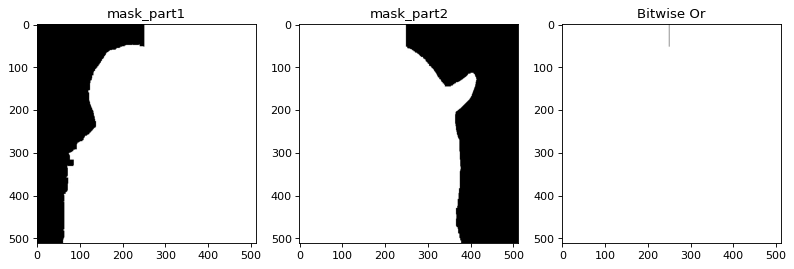

In [8]:
# Bitwise_And Two Mask Part
mask = cv2.bitwise_or(mask_part1,mask_part2)

# plt
plt.figure(figsize=(12,4), dpi=80)
plt.subplot(1,3,1)
plt.imshow(mask_part1, "gray")
plt.title("mask_part1")
plt.subplot(1,3,2)
plt.imshow(mask_part2, "gray")
plt.title("mask_part2")
plt.subplot(1,3,3)
plt.imshow(mask, "gray")
plt.title("Bitwise Or")

Text(0.5, 1.0, 'img mask')

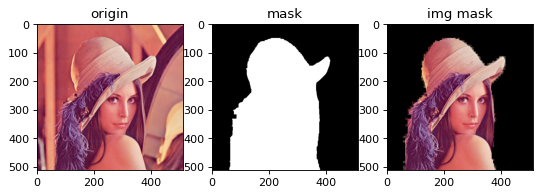

In [9]:
# Mask Origin Image
mask = cv2.imread(r".\images\opencv-basic\mask_demo.jpg", cv2.IMREAD_GRAYSCALE)
img_mask = cv2.bitwise_or(img_ori,img_ori, mask=mask)

# plt
plt.figure(figsize=(8,4), dpi=80)
plt.subplot(1,3,1)
plt.imshow(img_ori)
plt.title("origin")
plt.subplot(1,3,2)
plt.imshow(mask, "gray")
plt.title("mask")
plt.subplot(1,3,3)
plt.imshow(img_mask)
plt.title("img mask")

### 3.2.3 bitwise_xor
* 不同为1，相同为0

Text(0.5, 1.0, 'Bitwise Xor')

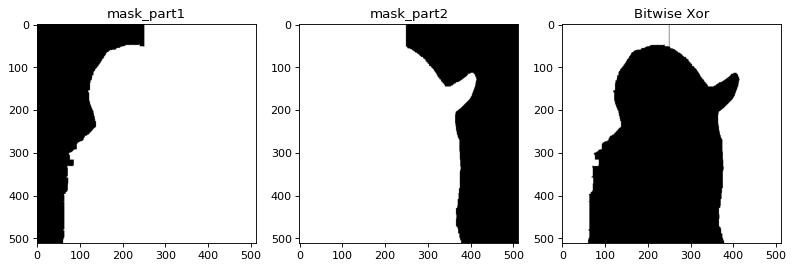

In [10]:
# Bitwise_And Two Mask Part
mask = cv2.bitwise_xor(mask_part1,mask_part2)

# plt
plt.figure(figsize=(12,4), dpi=80)
plt.subplot(1,3,1)
plt.imshow(mask_part1, "gray")
plt.title("mask_part1")
plt.subplot(1,3,2)
plt.imshow(mask_part2, "gray")
plt.title("mask_part2")
plt.subplot(1,3,3)
plt.imshow(mask, "gray")
plt.title("Bitwise Xor")

Text(0.5, 1.0, 'origin mask')

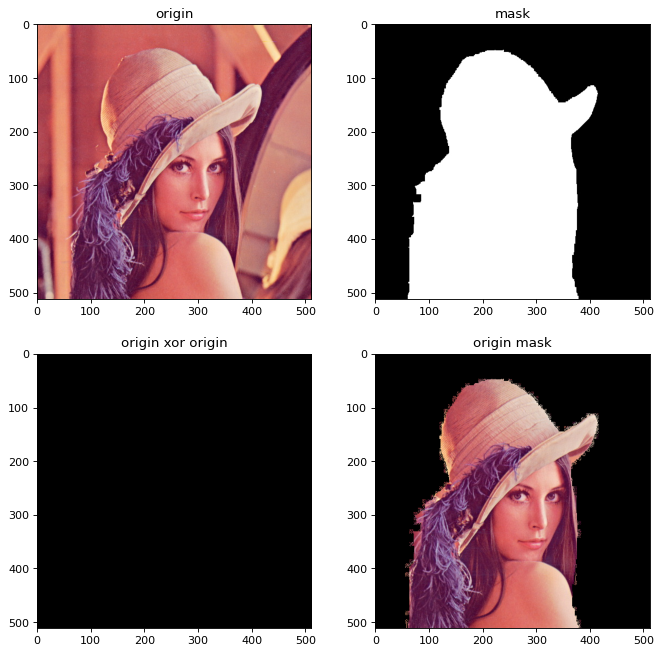

In [11]:
# Mask Origin Image
mask = cv2.imread(r".\images\opencv-basic\mask_demo.jpg", cv2.IMREAD_GRAYSCALE)
img_xor = cv2.bitwise_xor(img_ori,img_ori)
black_pic = np.zeros(np.shape(img_ori), dtype=np.uint8)
img_mask = cv2.bitwise_xor(img_ori,black_pic, mask=mask)

# plt
plt.figure(figsize=(10,10), dpi=80)
plt.subplot(2,2,1)
plt.imshow(img_ori)
plt.title("origin")
plt.subplot(2,2,2)
plt.imshow(mask, "gray")
plt.title("mask")
plt.subplot(2,2,3)
plt.imshow(img_xor)
plt.title("origin xor origin")
plt.subplot(2,2,4)
plt.imshow(img_mask)
plt.title("origin mask")

### 3.2.3 bitwise_not
* 取反

Text(0.5, 1.0, 'bitwise not')

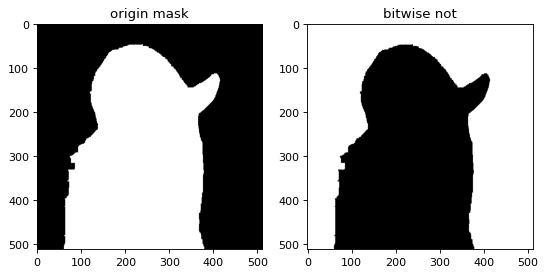

In [12]:
# Bitwise_And Two Mask Part
mask_ori = cv2.imread(r".\images\opencv-basic\mask_demo.jpg", cv2.IMREAD_GRAYSCALE)
mask = cv2.bitwise_not(mask_ori)

# plt
plt.figure(figsize=(8,4), dpi=80)
plt.subplot(1,2,1)
plt.imshow(mask_ori, "gray")
plt.title("origin mask")
plt.subplot(1,2,2)
plt.imshow(mask, "gray")
plt.title("bitwise not")

Text(0.5, 1.0, 'mask bitwise_not origin')

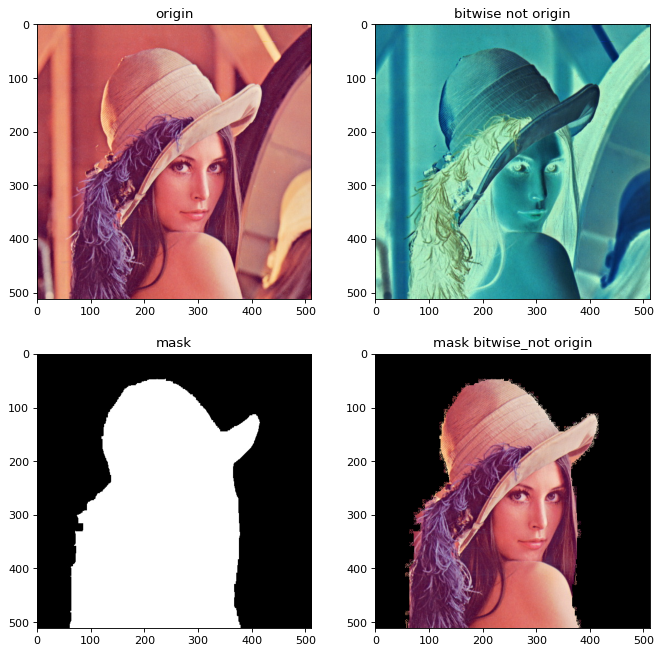

In [13]:
# Mask Origin Image
mask = cv2.imread(r".\images\opencv-basic\mask_demo.jpg", cv2.IMREAD_GRAYSCALE)
img_inv = cv2.bitwise_not(img_ori)
img_mask = cv2.bitwise_not(img_inv, mask=mask)

# plt
plt.figure(figsize=(10,10), dpi=80)
plt.subplot(2,2,1)
plt.imshow(img_ori)
plt.title("origin")
plt.subplot(2,2,2)
plt.imshow(img_inv)
plt.title("bitwise not origin")
plt.subplot(2,2,3)
plt.imshow(mask, "gray")
plt.title("mask")
plt.subplot(2,2,4)
plt.imshow(img_mask)
plt.title("mask bitwise_not origin")

## 3.3 例题
* 对下图（图片地址为".\images\beautiful_flower.jpg"）执行掩码等操作，得到如右图所示的效果。
    * 矩形的掩码区域height范围为171-374，width范围为56-273
    * 圆形的掩码区域center为(375, 280), radius为120
    * 掩码完成后在图像(250, 90)位置写上“花”这个字，textsize为60。
<table>
  <td>
    <img src=".\images\beautiful_flower.jpg" style="zoom:80%">
  </td>
  <td>
    <img src=".\images\examples\flower_result2.jpg" style="zoom:80%">
  </td>
</table>

In [1]:
#import
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw,ImageFont
from typing import Tuple

def cv2AddChineseText(
    img:np.ndarray, 
    text:str, 
    position:Tuple[int, int], 
    textColor:Tuple[int, int, int]=(0, 255, 0), 
    textSize:int=30,
    thickness:int=2
) -> np.ndarray:
    if isinstance(img, str):
        img = cv2.imread(img)
        
    if isinstance(img, np.ndarray):  
        img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        raise Exception("请输入cv2格式的图片！")
    
    draw = ImageDraw.Draw(img)

    fontStyle = ImageFont.truetype(
        "simsun.ttc", textSize, encoding="utf-8")

    draw.text(position, text, textColor, font=fontStyle, stroke_width=thickness)

    return cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)

读取成功！


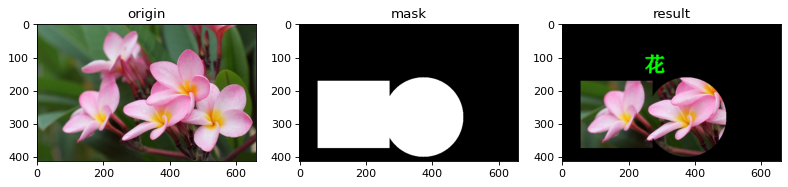

In [2]:
# imread
img_flower = cv2.imread(r".\images\beautiful_flower.jpg")
if isinstance(img_flower, (np.ndarray, np.generic)):
    print("读取成功！")
else:
    raise Exception("读取错误！")

# create mask image
# 方法1
mask1 = np.zeros(np.shape(img_flower)[:-1])
mask1[171:374, 56:273] = 255
mask1 = mask1.astype(np.uint8)
mask2 = np.zeros(np.shape(img_flower)[:-1], dtype=np.uint8)
cv2.circle(mask2, (375, 280), 120, 255, thickness=-1)
mask = cv2.bitwise_or(mask1, mask2)
"""
# 方法2
mask = np.zeros(np.shape(img_flower)[:-1])
mask[171:374, 56:273] = 255
cv2.circle(mask, (375, 280), 120, 255, thickness=-1)
mask = mask.astype(np.uint8)
"""

# Mask flower image
img_result = cv2.bitwise_and(img_flower, img_flower, mask=mask)

# Add Text
img_result = cv2AddChineseText(img=img_result,
                               text="花",
                               position=(250, 90),
                               textSize=60,
                               )

# plt
index = 0
img_flower = cv2.cvtColor(img_flower, cv2.COLOR_BGR2RGB)
img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)
titles = ["origin",   "mask",   "result"]
plt.figure(figsize=(12,4), dpi=80)
for img in [img_flower, mask, img_result]:
    plt.subplot(1, 3, index+1)
    if len(np.shape(img)) == 2:
        plt.imshow(img, "gray")
    else:
        plt.imshow(img)
    plt.title(titles[index])
    index += 1

## The End

2023.4